In [7]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("rmisra/news-category-dataset")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/news-category-dataset


In [8]:
import pandas as pd
import os

# Define the path to the dataset
dataset_path = os.path.join(path, 'News_Category_Dataset_v3.json')

# Load the dataset into a pandas DataFrame
df = pd.read_json(dataset_path, lines=True)


In [9]:
# Combine 'headline' and 'short_description' into a single text field
df['text'] = df['headline'] + ' ' + df['short_description']

# Select relevant columns for analysis
df = df[['category', 'text']]

# Optional: Display the number of articles per category
print(df['category'].value_counts())


category
POLITICS          35602
WELLNESS          17945
ENTERTAINMENT     17362
TRAVEL             9900
STYLE & BEAUTY     9814
PARENTING          8791
HEALTHY LIVING     6694
QUEER VOICES       6347
FOOD & DRINK       6340
BUSINESS           5992
COMEDY             5400
SPORTS             5077
BLACK VOICES       4583
HOME & LIVING      4320
PARENTS            3955
THE WORLDPOST      3664
WEDDINGS           3653
WOMEN              3572
CRIME              3562
IMPACT             3484
DIVORCE            3426
WORLD NEWS         3299
MEDIA              2944
WEIRD NEWS         2777
GREEN              2622
WORLDPOST          2579
RELIGION           2577
STYLE              2254
SCIENCE            2206
TECH               2104
TASTE              2096
MONEY              1756
ARTS               1509
ENVIRONMENT        1444
FIFTY              1401
GOOD NEWS          1398
U.S. NEWS          1377
ARTS & CULTURE     1339
COLLEGE            1144
LATINO VOICES      1130
CULTURE & ARTS     1074
EDUCATI

In [4]:
from sklearn.model_selection import train_test_split

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    df['text'], df['category'], test_size=0.2, random_state=42
)


In [5]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize the TF-IDF Vectorizer
vectorizer = TfidfVectorizer(max_features=5000)

# Fit and transform the training data; transform the testing data
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)


In [10]:
from sklearn.linear_model import LogisticRegression

# Initialize the Logistic Regression model
model = LogisticRegression(max_iter=1000)

# Train the model on the TF-IDF-transformed training data
model.fit(X_train_tfidf, y_train)


LogisticRegression(max_iter=1000)

In [11]:
from sklearn.metrics import classification_report

# Predict categories for the testing data
y_pred = model.predict(X_test_tfidf)

# Display the classification report
print(classification_report(y_test, y_pred))


                precision    recall  f1-score   support

          ARTS       0.36      0.18      0.24       293
ARTS & CULTURE       0.33      0.12      0.17       275
  BLACK VOICES       0.45      0.29      0.35       889
      BUSINESS       0.47      0.43      0.45      1216
       COLLEGE       0.47      0.30      0.37       202
        COMEDY       0.51      0.38      0.43      1022
         CRIME       0.53      0.54      0.53       713
CULTURE & ARTS       0.58      0.21      0.31       202
       DIVORCE       0.80      0.65      0.72       664
     EDUCATION       0.46      0.26      0.33       209
 ENTERTAINMENT       0.53      0.74      0.62      3419
   ENVIRONMENT       0.63      0.19      0.29       313
         FIFTY       0.33      0.06      0.10       263
  FOOD & DRINK       0.59      0.69      0.63      1270
     GOOD NEWS       0.46      0.16      0.24       270
         GREEN       0.38      0.28      0.32       532
HEALTHY LIVING       0.40      0.25      0.31  

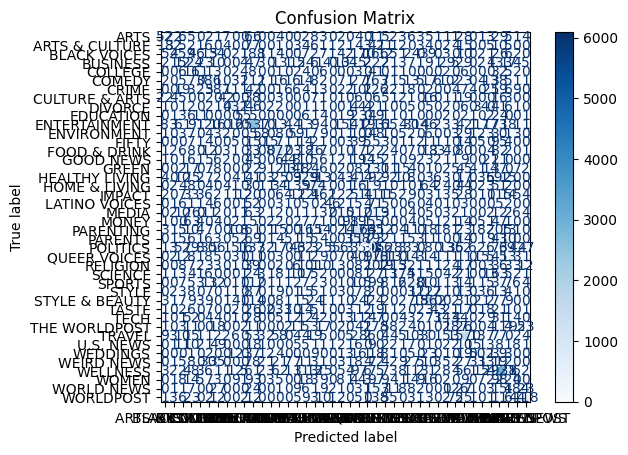

In [12]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Assuming y_test and y_pred are defined
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()


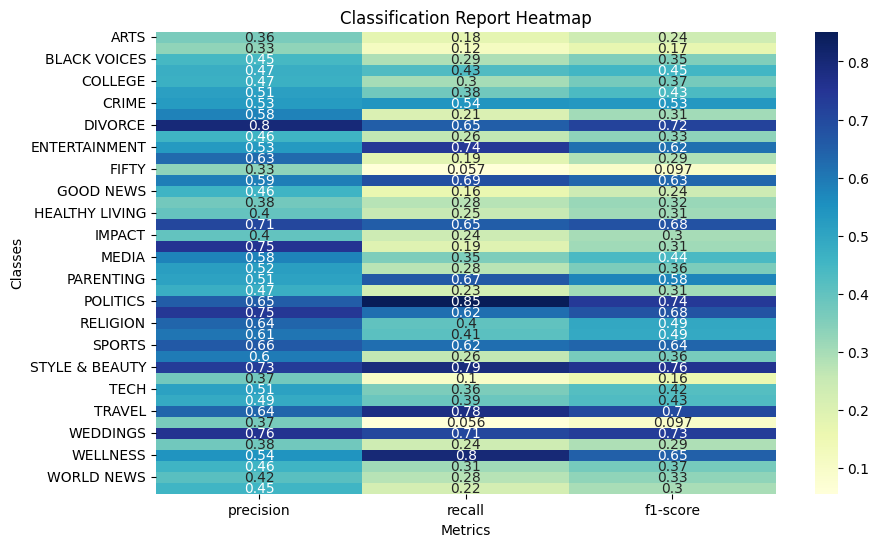

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report
import pandas as pd

# Generate classification report
report = classification_report(y_test, y_pred, output_dict=True)
df_report = pd.DataFrame(report).transpose()

# Select only the classes (excluding 'accuracy', 'macro avg', 'weighted avg')
df_classes = df_report.iloc[:-3, :]

# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df_classes[['precision', 'recall', 'f1-score']], annot=True, cmap='YlGnBu')
plt.title('Classification Report Heatmap')
plt.ylabel('Classes')
plt.xlabel('Metrics')
plt.show()


In [15]:
import joblib

# Save the trained model
joblib.dump(model, 'news_classifier_model.pkl')

# Save the TF-IDF vectorizer
joblib.dump(vectorizer, 'tfidf_vectorizer.pkl')


['tfidf_vectorizer.pkl']